# Rainfall Prediction - Weather Forecasting
Problem Statement:
Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


Dataset available below




Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv
https://github.com/dsrscientist/dataset3

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, classification_report


from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, classification_report
from sklearn import metrics,model_selection
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix,mean_squared_error
from sklearn.preprocessing import scale
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn.linear_model import LinearRegression
from sklearn import metrics




import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("Desktop/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


_Its is the dataset of Australian rainfall prediction as well as amount of rainfall prediction in mm.
_The data contains variouse columns like date, location, min/max tem at 9am & 3pm, evaporation, wind direction, humidity, pressure, fraction of clouds,tempeartures, rain toda & rain tomorrow.
_The dataset is having 8425 rows & 23 columns.


In [5]:
df.shape

(8425, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

-Rainfall today, Rainfall tomorrow, Winddir9am/3pm,Windgustdir, date & location are the object dattype.
-Where as all other columns are float datatyep.

In [7]:
df.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

-Except date & location all other columns are having missing values.

In [8]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

#Handling the null values, As per my understanding we need to handle outliers first because we can not fill null values by mean method because of large outliers. It will impact on model prediction.

In [9]:
#Describing the Dataset

df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


-Total 8350 nos. of rows.

-Min temp:- -2 degere to 28 deg. , mean temp : 13 deg.
        
-Max Temp:-8 deg. to 41 deg., mean temp: 23 deg.
        
-Rainfall: Min rainfall: 0 mm, maximun rainfall 371 mm, mean rainfall 2.8 mm. Outliers seen in rainfall.

-Evaporation: Null values & outliers are seen in dataset. Min evaporation: 0 & max: 145., Mean evaporation: 5.3.

-Sunshine:Null values are seen in this column. Min sunshine:0 hrs. & max : 13 hrs., Mean sunshine : 7.6 hrs.

-WindGustSpeed:-Null values & outliers are seen in dataset. Min Windgustspeed: 7 , max: 107. Mean : 40.

-Humidity at 9am: min humidity 10 & maximunm 100, mean of morning humidity is 67.

-Humidity at 3pm: min : 3 & max-99.

-Pressure at 9am: min pressure-982 & max-1036.

-pressure at 3PM: Min pressure 982 & max 1036.4

-Cloud at 9am:min 0 clouds & max 8 fraction of cloud are seen.

-Cloud at 3pm: min 0 & max 8 clouds are seen.

-Temp at 9am:- Min temp at 9am .9 deg. & max: 39 deg.

-Temp at 3PM: min 7.3 deg & max- 44 deg.

In [10]:
#Seperating day, month & year from date column 

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [12]:
#dropping date column
df=df.drop(columns=["Date"], axis=1)

In [13]:
df.shape

(8425, 25)

In [14]:
#After reshaping & dropping we got 25 columns 

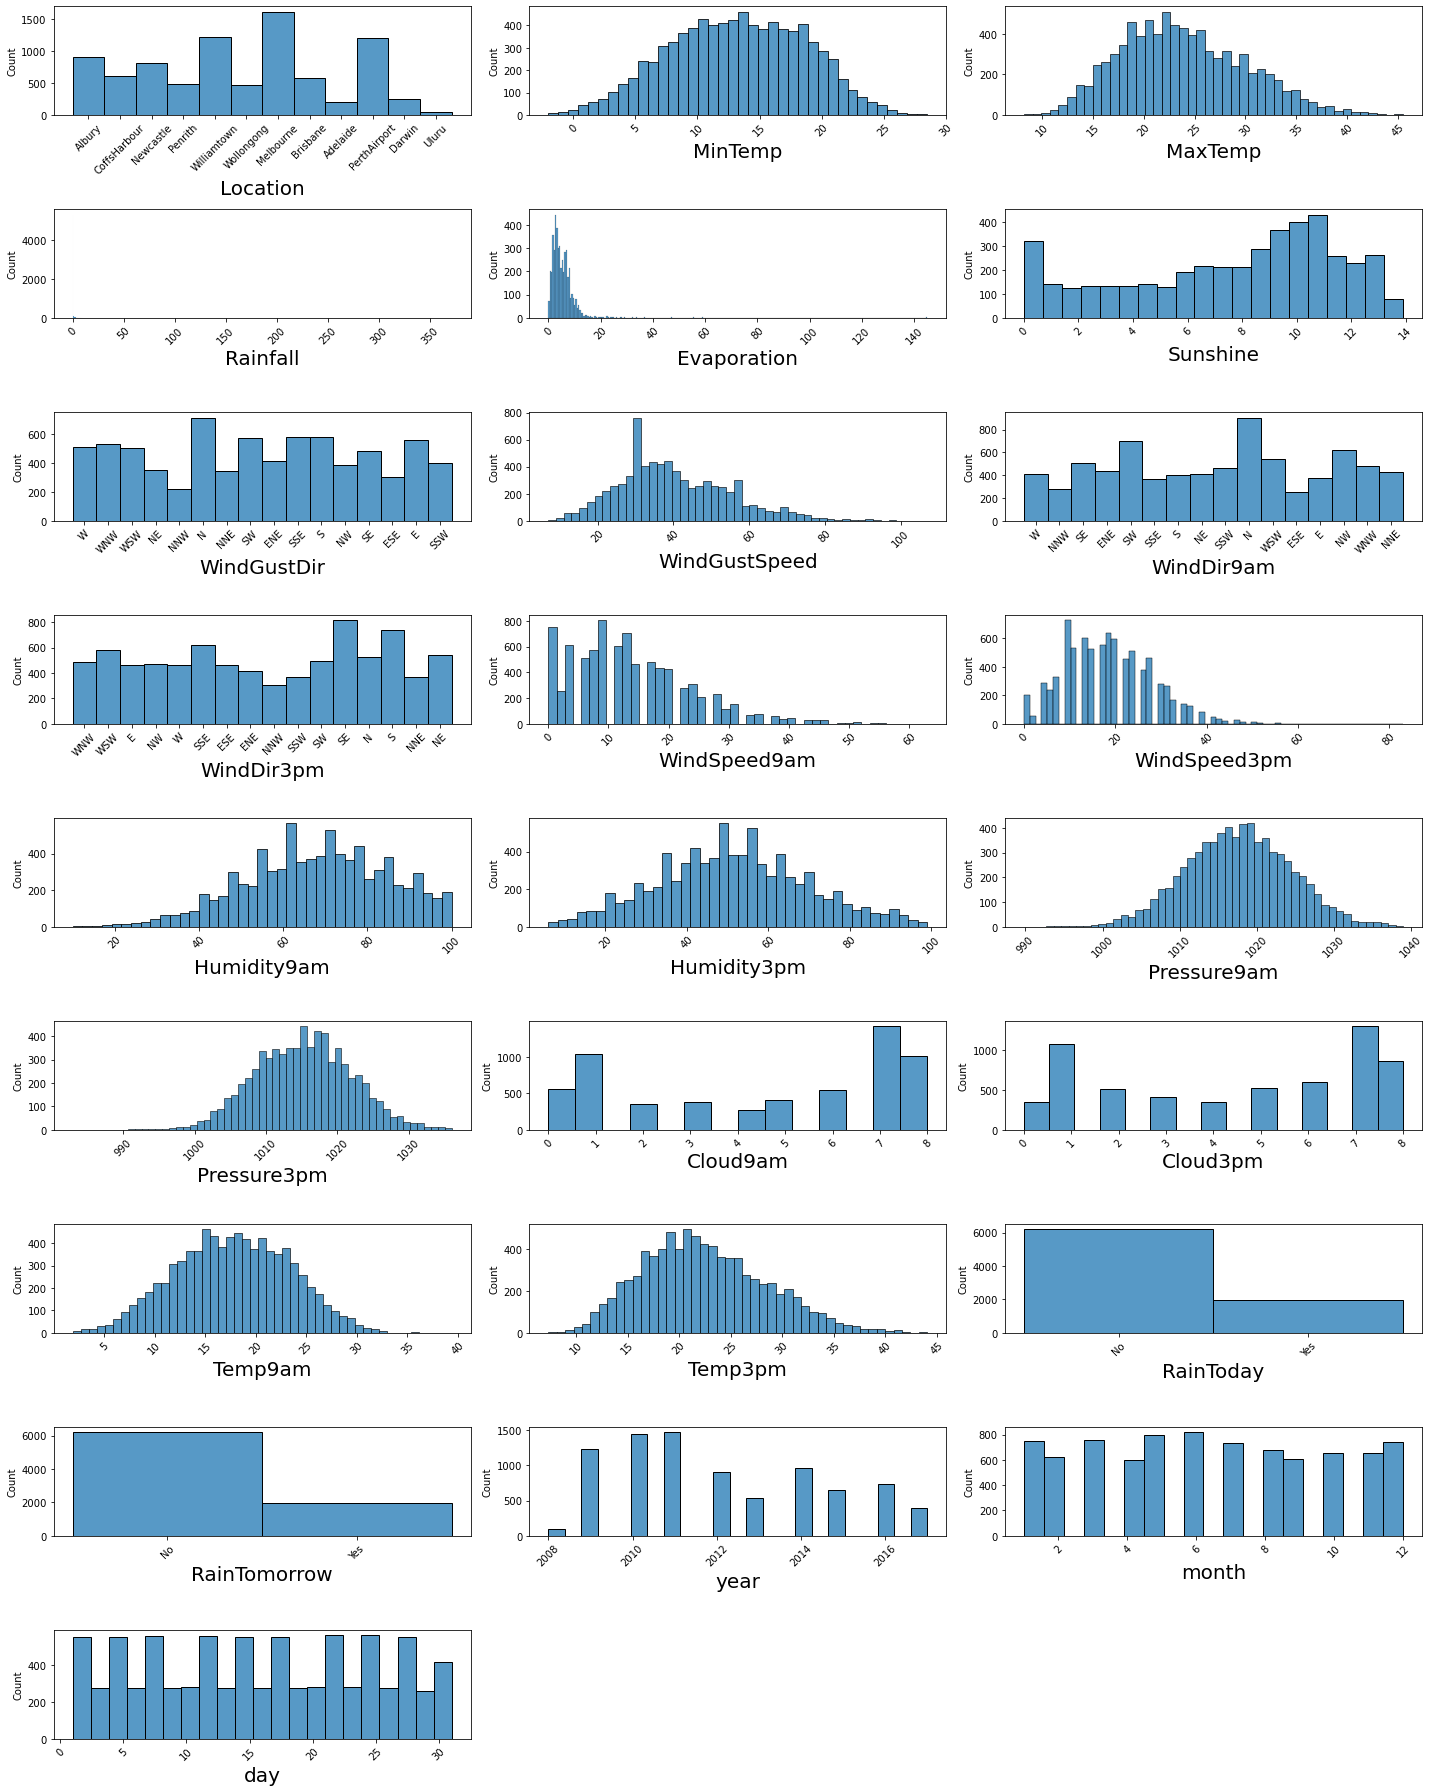

In [15]:
#Lets check data destribution, visualize the dataset

plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    if plotnumber<=25:
        ax=plt.subplot(9,3, plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column,fontsize=20)
        plt.xticks(rotation = 45)
    plotnumber+=1
    
plt.tight_layout()

-Data contains from variouse locations.

-Min temp :- In maximunm no. min temp is 10 to 20 deg. data is slitely negetively skewed.

-Max temp: max temp 17 to 30 deg. dataset is slitely positively skewed.
-Evapoaration: zero to 16. Data is highely positively skwed.
-Sunshine: Maximum 9 to 11 hrs. sunshine occures., followed by 0 to 1 hrs. sunshine observed.
-WindGustDir: Most in North direction, followed by SSE & S direction.
-WindSpeed9am: Most 0 to 20 is average wind speed. Dataset is positively skewed.
-Windspeed3PM:- 20 to 30 avrage speed of winds.Data is positively skewed.
-Wind Direction at 9am:- Most north  direction flows.
-Wind Direction at 3PM:- Mostly South east & south direction winds are flows.
-Humidity at 9am: 55 to 85 humidity is observed in morning.Data is negetively skewed.
-Humidity at 3pm:- 40 to 60 humidity observed at 3pm.
-Pressure at 9am & 3PM:- 1010 to 1030 pressure is reported. Data is negetively skewed.
-Cloud at 9am & 3pm: Most of time 7 fraction of clouds are seen at 9 am & 3pm, follwed by 8 times & 1 times.
-Temp at 9am to 3pm: 15 deg to 25 deg temperature is recorded.
-Rain Today: Most of the time rains are not recorded.
-Rain tomorrow:-Most of the time rain is not recorded.
-In 2009 to 2011 most of rain recorded.


In [16]:
#Seperating Numerical data columns.

df_num=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine',  'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']

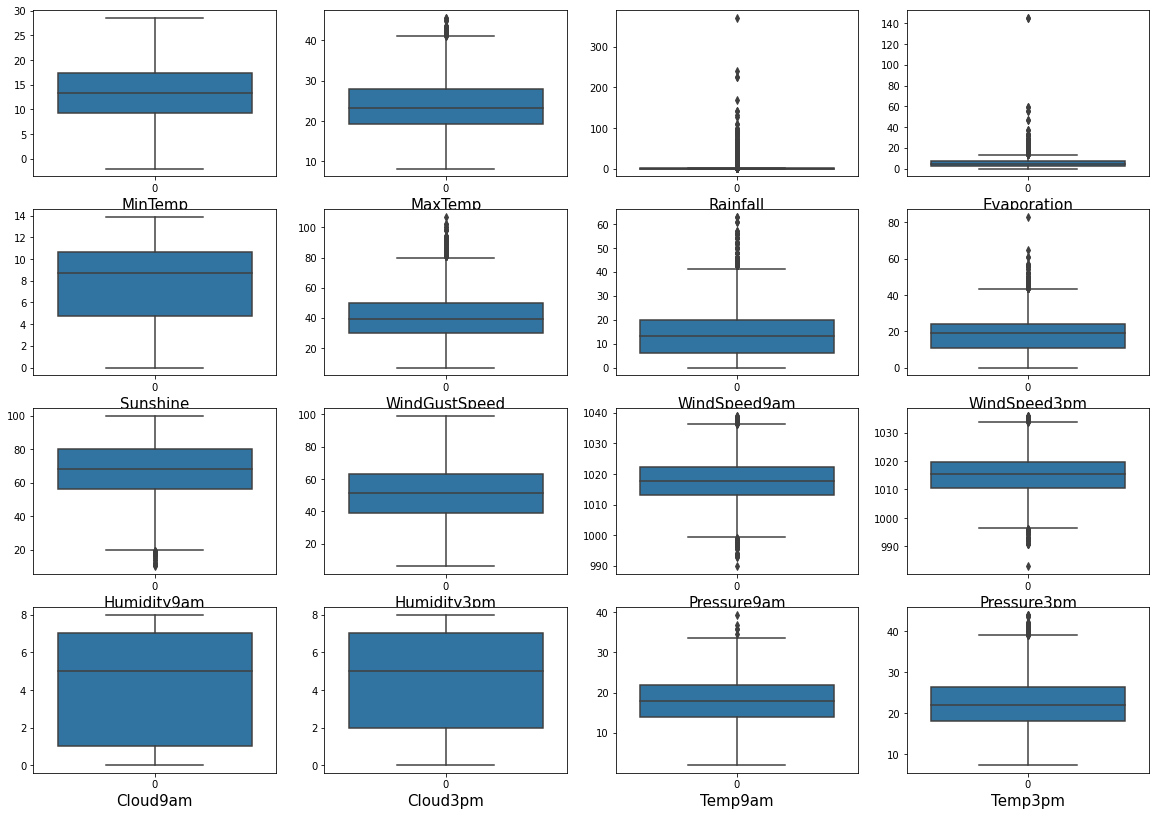

In [17]:
#Visualize the outliers of numerical columns using boxplot

plt.figure(figsize=(20,25))
graph=1

for column in df_num:
    if graph<=25:
        plt.subplot(7,4, graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=15)
        
    graph+=1
    
plt.show()

-Outliers are seen in Temp9am, temp3pm,Pressure 9am, pressure 3pm,Humidity9am, Windspeed 9am , Windspeed3pm, Windgustspeed, max temp,Windspped,rainfall & Evaporation

In [18]:
# we can see that there are many outliers in specially Rainfall and other featrures 
# lets handle this 
# Remove Outliers from Numerical Features 

features_with_outliers = df_num
for feature in features_with_outliers:
    
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit, feature] = lower_limit
    df.loc[df[feature]>upper_limit, feature] = upper_limit

# after running this the outliers will be removed from our numerical features of the data 

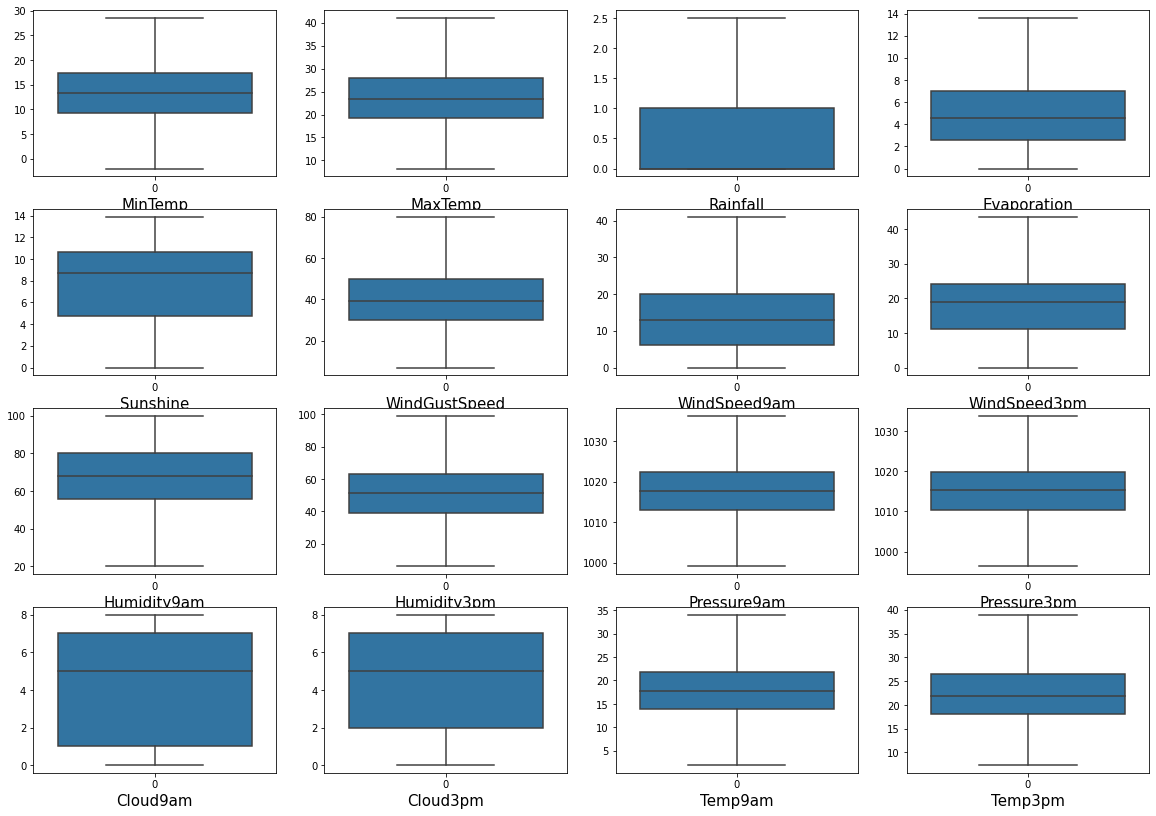

In [19]:
#Visualize the outliers using boxplot

plt.figure(figsize=(20,25))
graph=1

for column in df_num:
    if graph<=25:
        plt.subplot(7,4, graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=15)
        
    graph+=1
    
plt.show()

In [20]:
#We have removed all outliers.Now finding the shape of dataset
df.shape

(8425, 25)

In [21]:
#Filling missing values present in categorical columns with mode method

missing_categorical_values=['WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday', 'RainTomorrow']

In [22]:
#Filling the missing vaues with the use of mode method. 
for i in missing_categorical_values:
    
    df[i]=df[i].fillna(df[i].mode()[0])

In [23]:
#Finding null values after filling of null values
df.isna().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir         0
WindGustSpeed     991
WindDir9am          0
WindDir3pm          0
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday           0
RainTomorrow        0
year                0
month               0
day                 0
dtype: int64

In [24]:
#Filling null values of numerical columns using mean method
missing_numerical_values=[
                         'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine',  'WindGustSpeed', 
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']

In [25]:
for i in missing_numerical_values:
    
    df[i]=df[i].fillna(df[i].mean())

In [26]:
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
year             0
month            0
day              0
dtype: int64

In [27]:
#We have successfully filled the null values

In [28]:
#Finding the uniques values
dup=df.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))

Number of duplicate rows = 1663


#There is 1663 nos. of duplicate  values we can remove these records from the data set as they might not be adding any additional value and dropping these may provide distinct records only.

In [29]:
#Dropping the dupicate values from dataset
df.drop_duplicates(inplace=True)


In [30]:
#Finding the shape of dataset after removal of dataset
df.shape

(6762, 25)

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

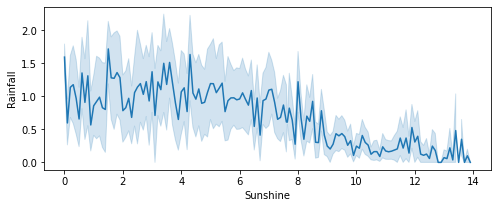

In [31]:
#Plotting Sunshine Vs Rainfall
plt.figure(figsize=(8,3))
sns.lineplot(x=df["Sunshine"], y=df["Rainfall"])

-Rainfall & SUnshine are universly proportional.

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

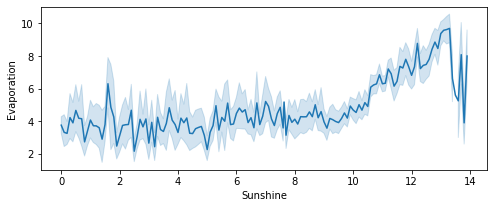

In [32]:
#Plotting Sunshine Vs Evaporation
plt.figure(figsize=(8,3))
sns.lineplot(x=df["Sunshine"], y=df["Evaporation"])

-Evaporation increase with sunshine increased

<AxesSubplot:xlabel='RainTomorrow', ylabel='Sunshine'>

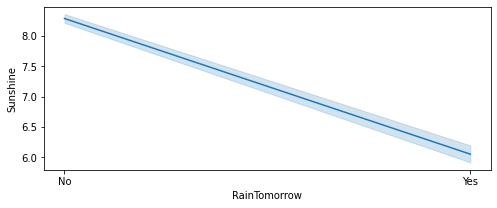

In [33]:
#Plotting RainToday Vs Sunshine
plt.figure(figsize=(8,3))
sns.lineplot(y=df["Sunshine"], x=df["RainTomorrow"])

-When there is more than 8 hrs sunshine then very less probability of Rain tomorrow, when sunshime is not present then chances of rains

<AxesSubplot:xlabel='month', ylabel='Rainfall'>

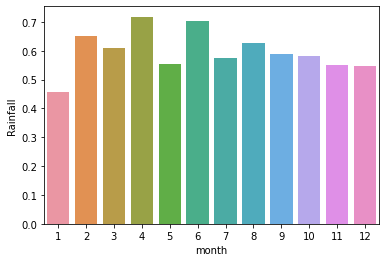

In [34]:
#Plotting which month rainfall is higher
sns.barplot(x=df["month"], y=df["Rainfall"], ci=None)

-IN April & june mamximum timerains are recorded.In all other months average rains are recorded.

<AxesSubplot:xlabel='year', ylabel='Rainfall'>

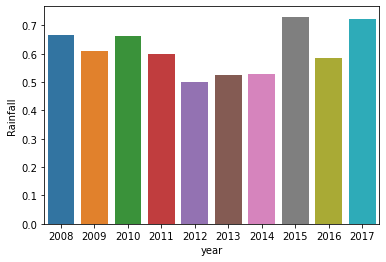

In [35]:
#Plotting which year rainfall is higher
sns.barplot(x=df["year"], y=df["Rainfall"], ci=None)

-In year 2015 & 2017 high rainfall is recorded.

<AxesSubplot:xlabel='Location', ylabel='Rainfall'>

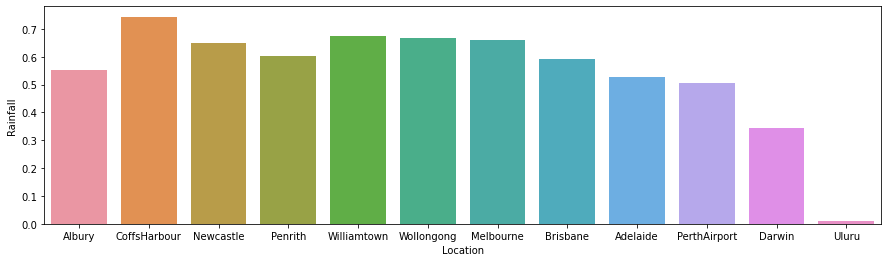

In [36]:

plt.figure(figsize=(15,4))
sns.barplot(x=df["Location"], y=df["Rainfall"], ci=None)

-CoffHarbour location high rainfall recorded, followed by Williamtown, Wollonong.

-Very less rainfall recorded in Uluru location

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.1'),
  Text(2, 0, '0.2'),
  Text(3, 0, '0.4'),
  Text(4, 0, '0.5'),
  Text(5, 0, '0.6'),
  Text(6, 0, '0.6102626756261404'),
  Text(7, 0, '0.7'),
  Text(8, 0, '0.8'),
  Text(9, 0, '1.0'),
  Text(10, 0, '1.2'),
  Text(11, 0, '1.4'),
  Text(12, 0, '1.5'),
  Text(13, 0, '1.6'),
  Text(14, 0, '1.8'),
  Text(15, 0, '1.9'),
  Text(16, 0, '2.0'),
  Text(17, 0, '2.1'),
  Text(18, 0, '2.2'),
  Text(19, 0, '2.3'),
  Text(20, 0, '2.4'),
  Text(21, 0, '2.5')])

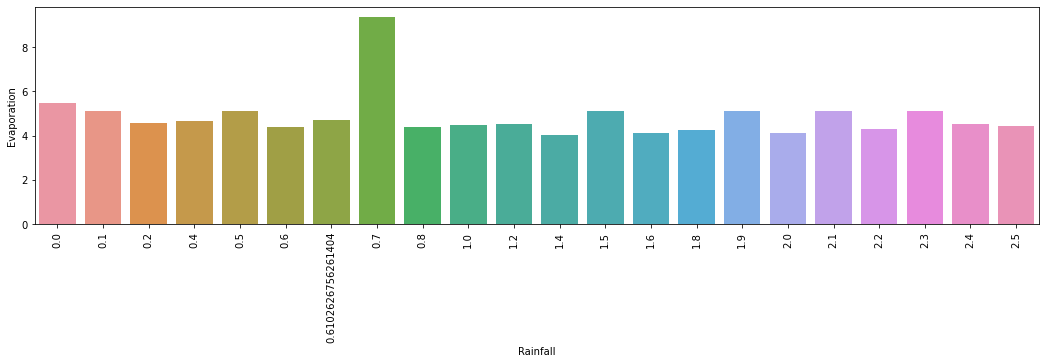

In [37]:
plt.figure(figsize=(18,4))
sns.barplot(y=df["Evaporation"], x=df["Rainfall"], ci=None)
plt.xticks(rotation=90)

High rainfall 0.7 mm recorded when evaporation is more than 9

<AxesSubplot:xlabel='RainTomorrow', ylabel='MinTemp'>

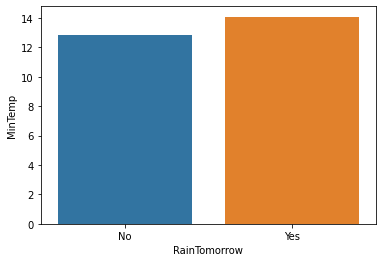

In [38]:

sns.barplot(y=df["MinTemp"], x=df["RainTomorrow"], ci=None)

When min temp is more than 14 degree then there is chances of rains tomorrow

<AxesSubplot:xlabel='RainTomorrow', ylabel='MaxTemp'>

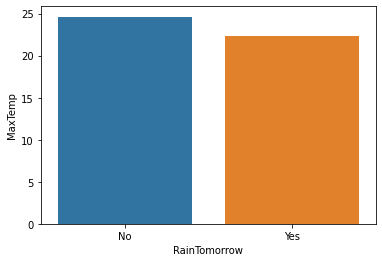

In [39]:

sns.barplot(y=df["MaxTemp"], x=df["RainTomorrow"], ci=None)

When temp is upto 25 deg. then there is chance of no rain but when max tem is less than 25 deg then there is chances of rains

<AxesSubplot:xlabel='RainTomorrow', ylabel='Evaporation'>

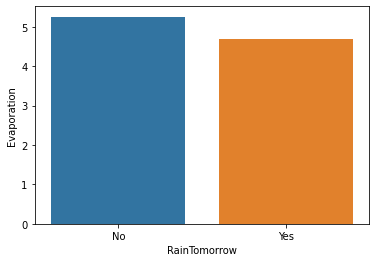

In [40]:
#Plotting Evaporation Vs Raintomorrow
sns.barplot(y=df["Evaporation"], x=df["RainTomorrow"], ci=None)

-When evaporation is more than 5 then less chances of rains tomorrow but when it is less than 5 then there is chances of rains tomorrow

<AxesSubplot:xlabel='RainTomorrow', ylabel='Sunshine'>

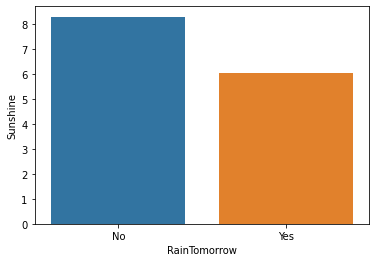

In [41]:
#Plotting Sunshine Vs RainTomorrow
sns.barplot(y=df["Sunshine"], x=df["RainTomorrow"], ci=None)

Sunshine is more than 8 hrs. then there is no chance of rains tomorrow, but when sunshine is less than 6 hrs. then chances of rains tomorrow.

<AxesSubplot:xlabel='WindGustSpeed', ylabel='RainTomorrow'>

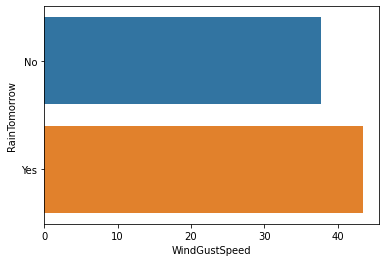

In [42]:
#Plotting WindGustSpeed Vs Rains Tomorrow
sns.barplot(x=df["WindGustSpeed"], y=df["RainTomorrow"], ci=None)

When windgustspeed is more than 40 then there is very less chances of rain tomorrow.
WHne it is less than 40 then there is chances of rains tomorrow.

<AxesSubplot:xlabel='RainTomorrow', ylabel='WindSpeed9am'>

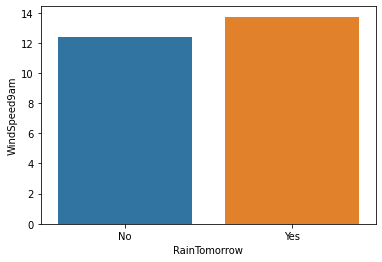

In [43]:
#Plotting Windspped9am Vs RainTomorrow
sns.barplot(y=df["WindSpeed9am"], x=df["RainTomorrow"], ci=None)

When windspeed 9am is up to 14 then there is chances of rain tomorrow. When it is less than 13 it is less  chances of rains.

<AxesSubplot:xlabel='RainTomorrow', ylabel='WindSpeed3pm'>

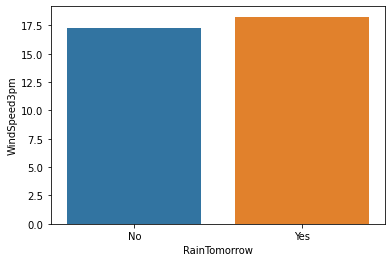

In [44]:
#Plotting Windspped3pm Vs RainTomorrow
sns.barplot(y=df["WindSpeed3pm"], x=df["RainTomorrow"], ci=None)

#When wind speed is more than 17.5 then there is chance of rains.

<AxesSubplot:xlabel='RainTomorrow', ylabel='Humidity9am'>

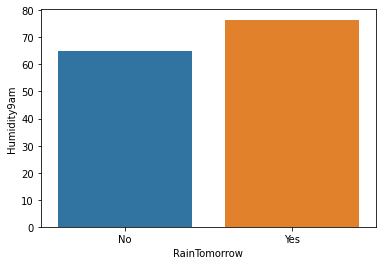

In [45]:
#Plotting Humidity 9am Vs Rans Tomorrow
sns.barplot(y=df["Humidity9am"], x=df["RainTomorrow"], ci=None)

Rain Tomorrow when humidity 9am is more than 70, if it is less than 70 or 65 then there is less chances of rains tomorrow.

<AxesSubplot:xlabel='RainTomorrow', ylabel='Humidity3pm'>

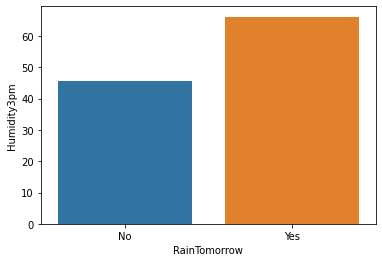

In [46]:
#Plotting Humidity 3pm Vs RainTomorrow
sns.barplot(y=df["Humidity3pm"], x=df["RainTomorrow"], ci=None)

When Humidity at  3 pm above 65 then there is chaces of rains tomorrow.If it is less than 50 then there is less chances of rain

<AxesSubplot:xlabel='RainTomorrow', ylabel='Pressure9am'>

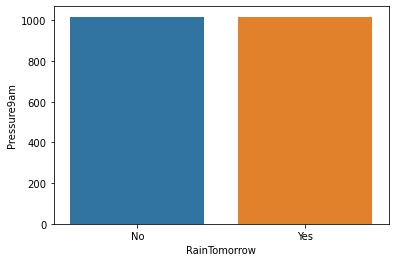

In [47]:
#Plotting Pressure 9am  Vs Rains Tomorrow
sns.barplot(y=df["Pressure9am"], x=df["RainTomorrow"], ci=None)

<AxesSubplot:xlabel='RainTomorrow', ylabel='Pressure9am'>

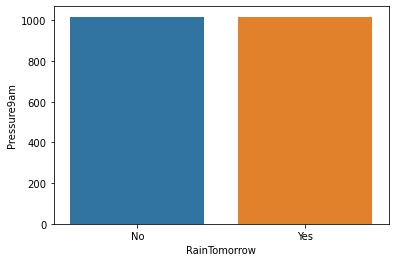

In [48]:
#Pltting Pressure at 3PM Vs Rains tomorrow
sns.barplot(y=df["Pressure9am"], x=df["RainTomorrow"], ci=None)

In [49]:
#We  can not conclude it it is rains tomorrow or not on the basis of pressure.

<AxesSubplot:xlabel='Humidity9am', ylabel='Pressure9am'>

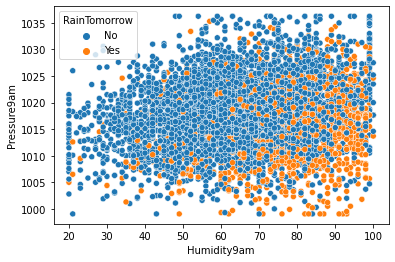

In [50]:
#Plotting Pressure 9am Vs Humidity 9am 

sns.scatterplot(y=df["Pressure9am"], x=df["Humidity9am"],hue=df["RainTomorrow"], ci=None)

When humidity is more than 50 then there is very good chances of rains tomorrow.Pressure doent contribute more on rains tomorrow but data says if more pressure it will not leads to rain fall.

<AxesSubplot:xlabel='Humidity3pm', ylabel='Pressure3pm'>

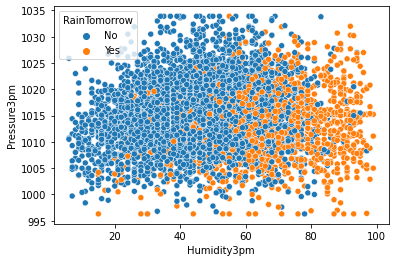

In [51]:
#Pressure at 3Pm Vs Humidity at 3PM 

sns.scatterplot(y=df["Pressure3pm"], x=df["Humidity3pm"],hue=df["RainTomorrow"], ci=None)

When humidity is more than 50 then there is big changes of rains tomorrow.

<AxesSubplot:xlabel='Humidity3pm', ylabel='MaxTemp'>

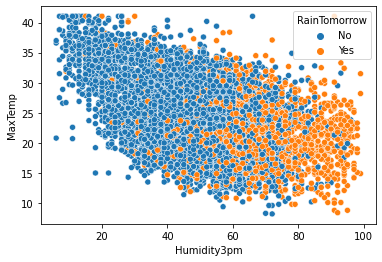

In [52]:
#Plotting Max Temp Vs Humidity 3pm

sns.scatterplot(y=df["MaxTemp"], x=df["Humidity3pm"], hue=df["RainTomorrow"],ci=None)

When temp is between 35 to 10 deg. & humidity is above 50 then there is good chances of rains tomorrow.

<AxesSubplot:xlabel='Humidity3pm', ylabel='MinTemp'>

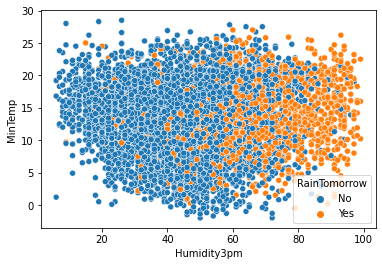

In [53]:
#Plotting Min Tem Vs Humidity at 3PM

sns.scatterplot(y=df["MinTemp"], x=df["Humidity3pm"],hue=df["RainTomorrow"], ci=None)

When min temp is in between 0 to 25 deg & humidity more than 50 then there is very good chances of rain tomorrow.

<AxesSubplot:xlabel='MaxTemp', ylabel='Evaporation'>

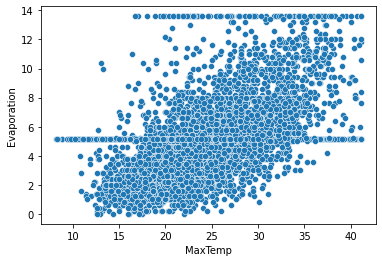

In [54]:
#Plotting MAx Tem Vs Evaporation

sns.scatterplot(x=df["MaxTemp"], y=df["Evaporation"], ci=None)

Realtionship is linear, Evaporation increase when temp increases

<AxesSubplot:xlabel='MinTemp', ylabel='Evaporation'>

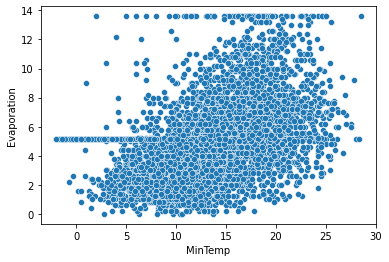

In [55]:
#Plotting Min Tem Vs Evaporation

sns.scatterplot(x=df["MinTemp"], y=df["Evaporation"],ci=None)

Linearly proportional relationship.

<AxesSubplot:xlabel='RainTomorrow', ylabel='Cloud9am'>

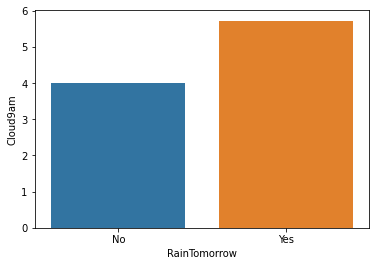

In [56]:
#Cloud at 9am Vs RainTomorrow

sns.barplot(y=df["Cloud9am"], x=df["RainTomorrow"], ci=None)

If cloud at 9 am is more than 5 then there is chances of rains tomorrow.

<AxesSubplot:xlabel='RainTomorrow', ylabel='Cloud3pm'>

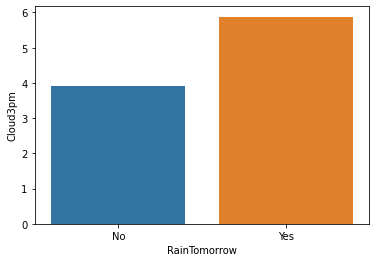

In [57]:
#Plotting Cloud at 3 PM Vs Rain tomorrow

sns.barplot(y=df["Cloud3pm"], x=df["RainTomorrow"], ci=None)

<AxesSubplot:xlabel='RainTomorrow', ylabel='Temp9am'>

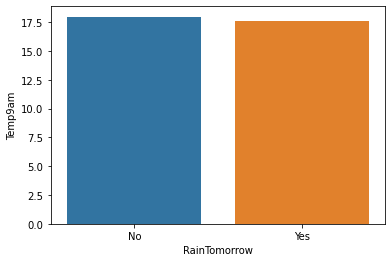

In [58]:
#Plotting Temp at 9am Vs Rains Tomorrow

sns.barplot(y=df["Temp9am"], x=df["RainTomorrow"], ci=None)

<AxesSubplot:xlabel='RainTomorrow', ylabel='Temp3pm'>

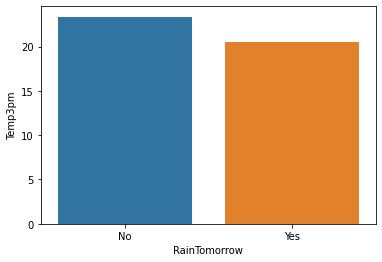

In [59]:


sns.barplot(y=df["Temp3pm"], x=df["RainTomorrow"], ci=None)

<AxesSubplot:xlabel='Cloud9am', ylabel='Temp9am'>

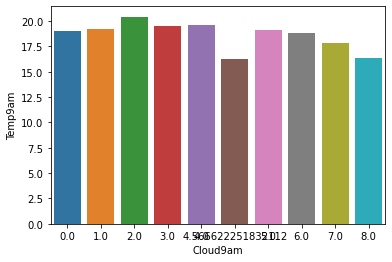

In [60]:
#Plotting Temp 9am Vs Cloud 9am

sns.barplot(y=df["Temp9am"], x=df["Cloud9am"], ci=None)

<AxesSubplot:xlabel='Cloud3pm', ylabel='Temp3pm'>

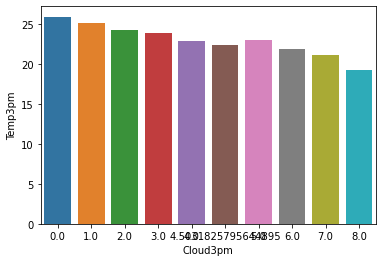

In [61]:


sns.barplot(y=df["Temp3pm"], x=df["Cloud3pm"], ci=None)

When clouds are increase then temp is decraeses

<AxesSubplot:xlabel='Cloud3pm', ylabel='Humidity3pm'>

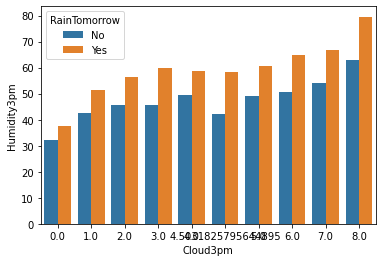

In [62]:
#Plotting Humidity Vs Cloud at 9am

sns.barplot(y=df["Humidity3pm"], x=df["Cloud3pm"],hue=df["RainTomorrow"], ci=None)

When fraction of clouds are increased then humidity is laso increased. This will leads to rainfall tomorrow

<AxesSubplot:xlabel='Cloud9am', ylabel='Humidity9am'>

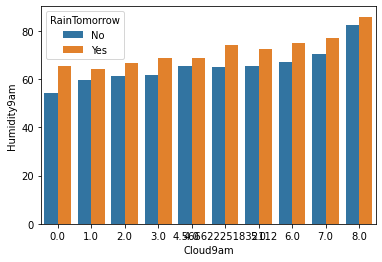

In [63]:
#Plotting Humidity Vs Cloud at 3pm

sns.barplot(y=df["Humidity9am"], x=df["Cloud9am"],hue=df["RainTomorrow"], ci=None)

When fraction of clouds are increased then humidity is laso increased. This will leads to rainfall tomorrow

<AxesSubplot:xlabel='WindGustDir', ylabel='WindGustSpeed'>

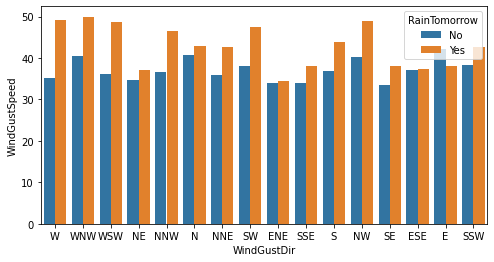

In [64]:
#Plotting Wind Direction Vs Wind Speed
plt.figure(figsize=(8,4))
sns.barplot(x=df["WindGustDir"], y=df["WindGustSpeed"],hue=df["RainTomorrow"], ci=None)

Whenwindgustspeed is more than 35 then there is good probability of rains tomorrow.

<AxesSubplot:xlabel='WindDir9am', ylabel='WindSpeed9am'>

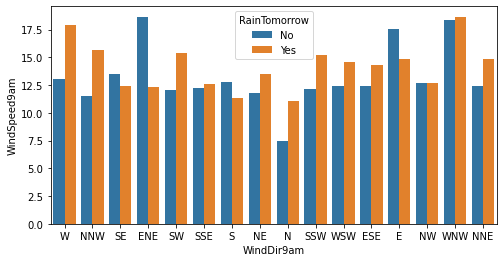

In [65]:
plt.figure(figsize=(8,4))

sns.barplot(x=df["WindDir9am"], y=df["WindSpeed9am"],hue=df["RainTomorrow"], ci=None)

When wind speed is at 9 am is more than 12.5 then there is good chances of rains tomorrow

<AxesSubplot:xlabel='WindDir3pm', ylabel='WindSpeed3pm'>

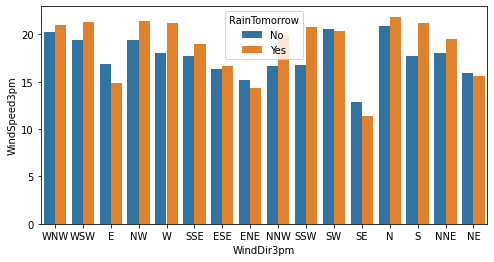

In [66]:
plt.figure(figsize=(8,4))

sns.barplot(x=df["WindDir3pm"], y=df["WindSpeed3pm"],hue=df["RainTomorrow"], ci=None)

<AxesSubplot:xlabel='Cloud9am', ylabel='WindSpeed9am'>

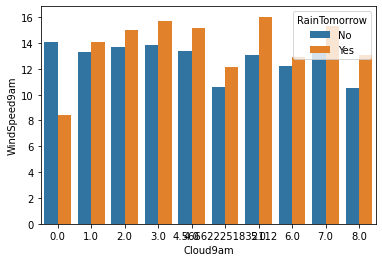

In [67]:


sns.barplot(x=df["Cloud9am"], y=df["WindSpeed9am"], hue=df["RainTomorrow"],ci=None)

When clouds aremore then there is good chances of rains tomorrow

<AxesSubplot:xlabel='Cloud3pm', ylabel='WindSpeed3pm'>

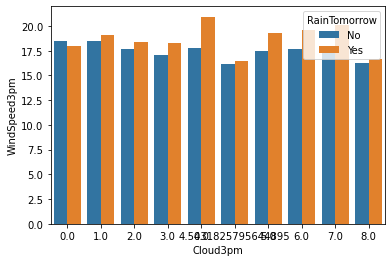

In [68]:


sns.barplot(x=df["Cloud3pm"], y=df["WindSpeed3pm"],hue=df["RainTomorrow"], ci=None)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '4.5031825795644895'),
  Text(6, 0, '5.0'),
  Text(7, 0, '6.0'),
  Text(8, 0, '7.0'),
  Text(9, 0, '8.0')])

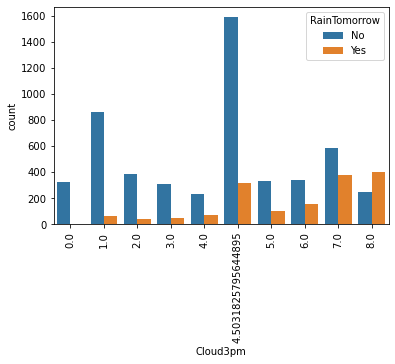

In [69]:
sns.countplot(df["Cloud3pm"], hue=df["RainTomorrow"])
plt.xticks(rotation=90)

When Cloud at 3PM is 4.5 then there is high chances of rains tomorrow.

# lets Encode object datatype using label encoder

In [70]:
from sklearn.preprocessing import LabelEncoder
lab_enc= LabelEncoder()

In [71]:
cols=["Location","WindGustDir","WindDir9am","WindDir3pm","RainToday","RainTomorrow"]

df[cols]=df[cols].apply(LabelEncoder().fit_transform)

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1,13.4,22.9,0.6,5.119906,7.632205,13,44.0,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.0,5.119906,7.632205,14,44.0,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,0.0,5.119906,7.632205,15,46.0,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.0,0.0,5.119906,7.632205,4,24.0,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.3,1.0,5.119906,7.632205,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5


We have converted all dataset in numeric form

In [72]:
#Checking Skewness
df.skew()

Location        -0.000009
MinTemp         -0.084177
MaxTemp          0.308729
Rainfall         1.270776
Evaporation      1.019395
Sunshine        -0.743759
WindGustDir      0.181462
WindGustSpeed    0.615065
WindDir9am       0.220355
WindDir3pm      -0.123726
WindSpeed9am     0.773776
WindSpeed3pm     0.385018
Humidity9am     -0.238830
Humidity3pm      0.149053
Pressure9am      0.050229
Pressure3pm      0.071439
Cloud9am        -0.291165
Cloud3pm        -0.227885
Temp9am         -0.053969
Temp3pm          0.319387
RainToday        1.266937
RainTomorrow     1.266937
year             0.354481
month            0.021988
day              0.006240
dtype: float64

High Skewness is observed in Rain Today, Rain Tomorrow, Evaporation, Rainfall.

<AxesSubplot:>

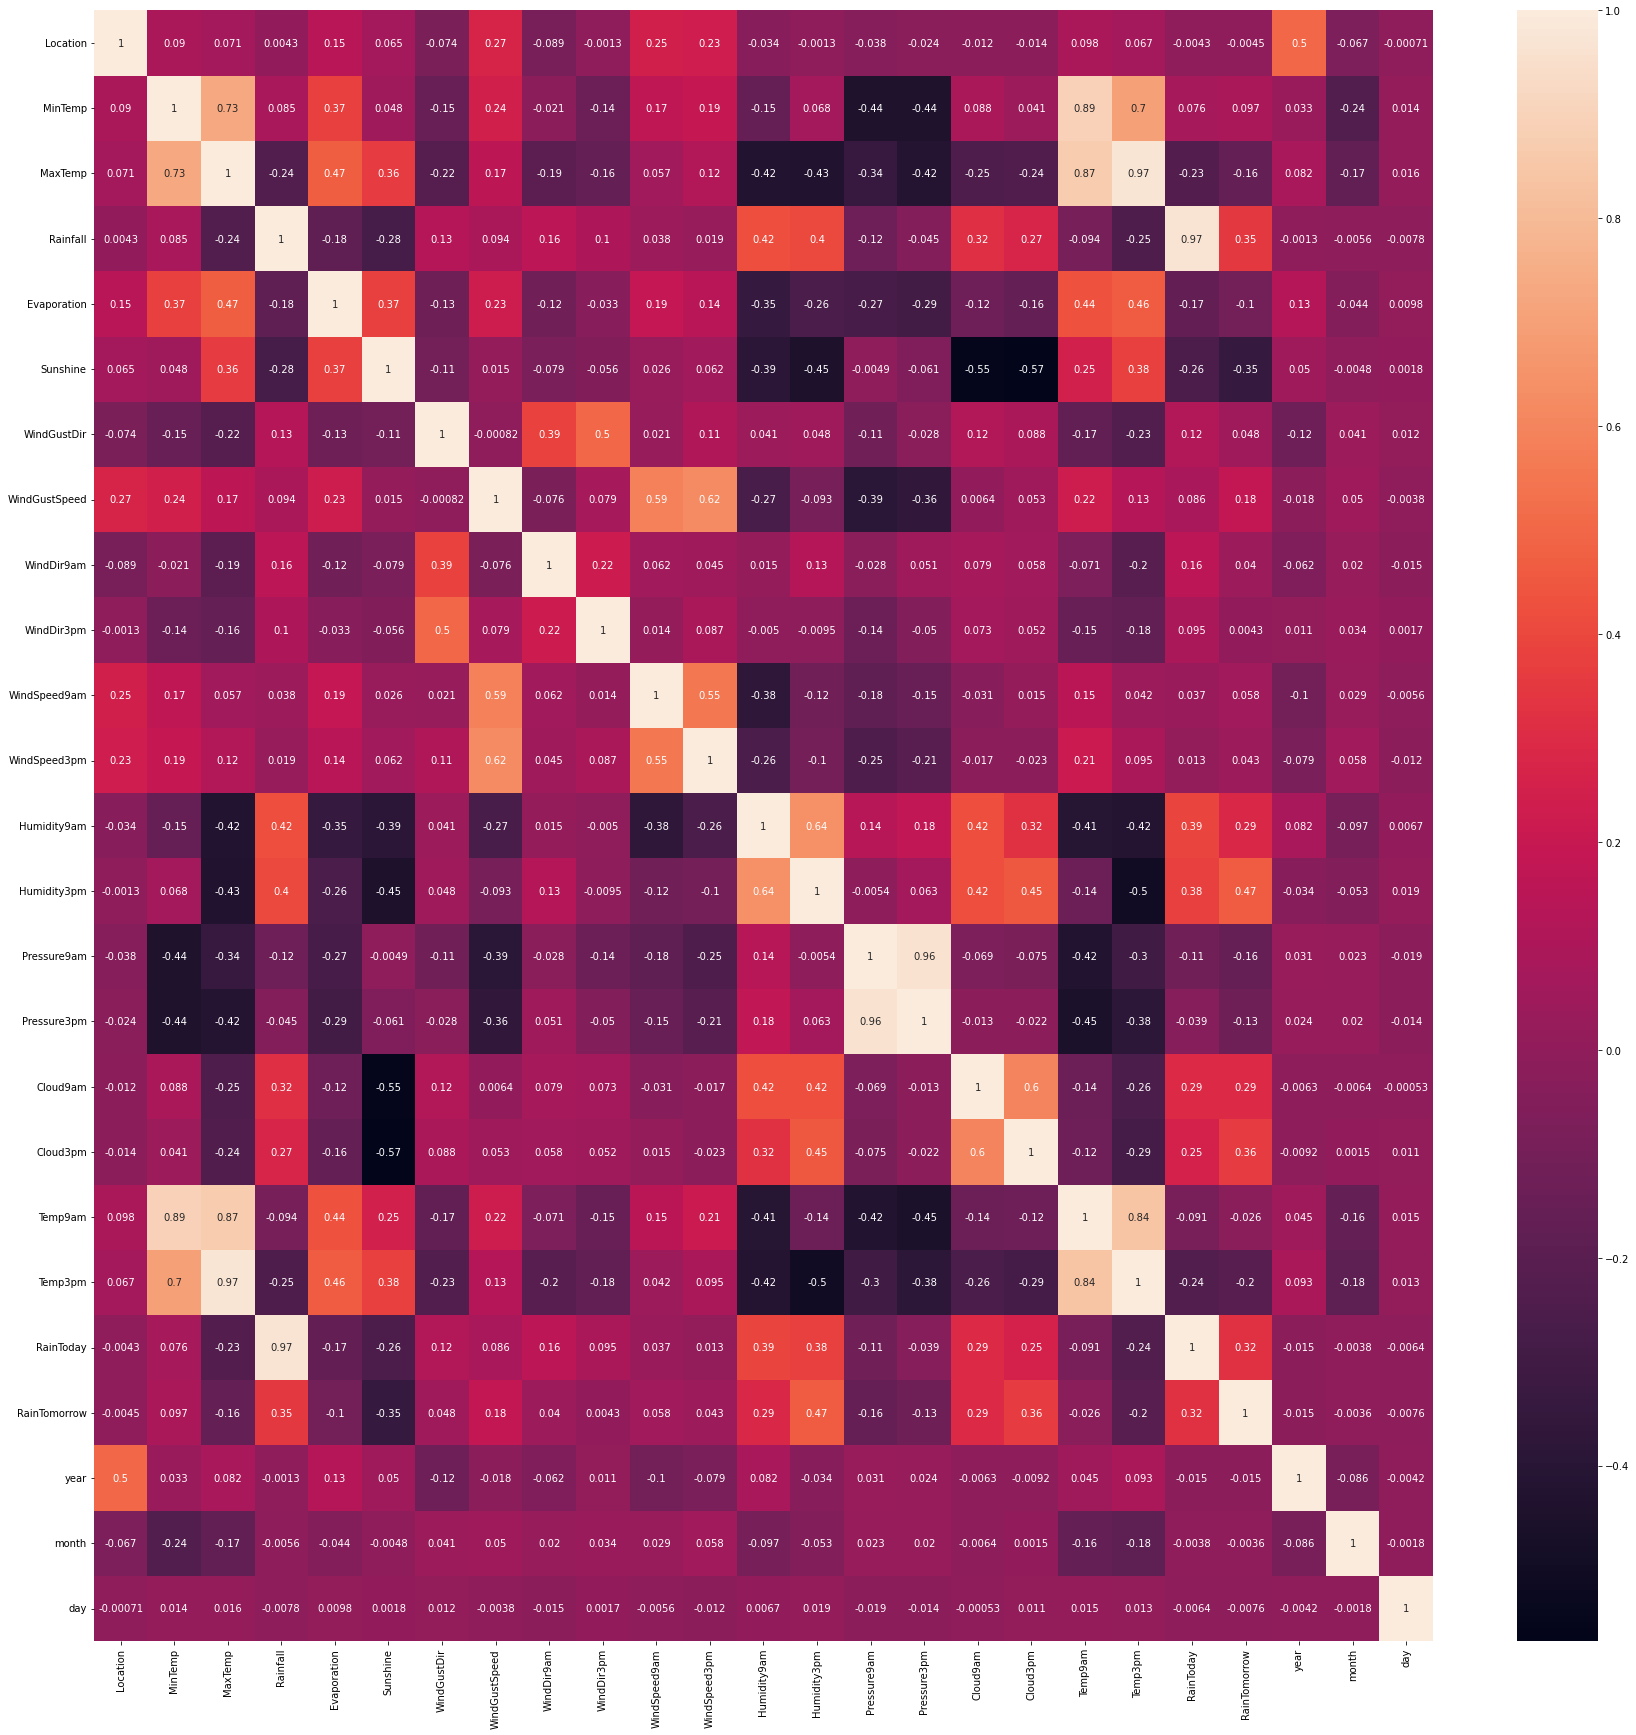

In [73]:

#Finding the correlationship between dataset using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True)

In [74]:
#From above it is observed that maxtemp & Temp3pm having highest correlation : 97%, maxTemp & Temp9am having : 87% correlation,MinTemp & Temp9am having 89% correaltion.
#Rainfall & raintoday : 97%

# Scaling using Standard scalar

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

In [75]:
x=df.drop("RainTomorrow", axis=1)
y=df["RainTomorrow"]

Seprating feature & label.
Label is Rain Tomorrow that we have to predict.

In [76]:
#Scaling of dataset
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

# Train Test Split

In [77]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled,y, test_size=0.25, random_state=1)

In [78]:
# Write a function & call to check accuracy score of different model

def metric_score (clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n =============Train Result===============")
        print(f"Accuracy score:{accuracy_score(y_train, y_pred)*100:.2f}%")
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print("\n =============Test Result================")
        print(f"Accuracy score:{accuracy_score(y_test, pred)*100:.2f}%")
        
        print("\n \n classification report \n", classification_report(y_test, pred, digits=2))
        

# Model Initialisatiion using Decision Tree classifier

In [79]:
#Model initialization
# Trying for Decision tree Classifier

clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [80]:
# Call the function & pass the data set into it.

metric_score(clf, x_train, x_test, y_train, y_test, train=True)  # This is for trainig score
metric_score(clf, x_train, x_test, y_train, y_test, train=False)  #This is for testing score


 =============Train Result===============
Accuracy score:100.00%

 =============Test Result================
Accuracy score:78.71%

 
 classification report 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1288
           1       0.55      0.56      0.56       403

    accuracy                           0.79      1691
   macro avg       0.71      0.71      0.71      1691
weighted avg       0.79      0.79      0.79      1691



Decision tree Testing accuracy score : 100%, Testing accuracy score: 78%, Precision : 70%, recall : 70%,.
DT is always overfit beacause of ruled based algorithm.

# Parameter tunning

In [81]:
#Tunning four important parameters & passing different values for both parameters
grid_param={
    "criterion":["gini","entropy"],
    "max_depth":range(10,15),
    "min_samples_leaf":range(2,6),
    "min_samples_split":range(3,8),
    "max_leaf_nodes":range(5,10)
}

In [82]:
grid_search=GridSearchCV(estimator=clf,
                        param_grid=grid_param,
                        cv=5,
                        n_jobs=-1)

In [83]:
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [84]:
#Finding the best parameters
best_parameters=grid_search.best_params_

print(best_parameters)


{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [87]:
#Initiating new parameters in decision tree classifier & train

clf=DecisionTreeClassifier(criterion= "gini", max_depth= 10,min_samples_split=3, max_leaf_nodes= 9, min_samples_leaf=3 )

#training of model

clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=9, min_samples_leaf=3,
                       min_samples_split=3)

In [88]:
#Now call the function & pass the data set & train the model

metric_score(clf, x_train, x_test, y_train, y_test, train=True)  # This is for trainig score
metric_score(clf, x_train, x_test, y_train, y_test, train=False)  #This is for testing score



 =============Train Result===============
Accuracy score:83.83%

 =============Test Result================
Accuracy score:80.54%

 
 classification report 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1288
           1       0.62      0.48      0.54       403

    accuracy                           0.81      1691
   macro avg       0.73      0.69      0.71      1691
weighted avg       0.79      0.81      0.80      1691



After parameter tunning we have successfully increased the accuracy score from 78% to 80%, Precision : 73%. recall: 69%.

In [89]:
#Predicting y_pred

y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [90]:
#Plotting confusion matrix.

conf_matrix=confusion_matrix(y_test, y_pred)
conf_matrix

array([[1168,  120],
       [ 209,  194]], dtype=int64)

In [91]:
#Finding  False positive rate, True positive rate, threshold, AUC, ROC curve.

fpr, tpr, thresholds=roc_curve(y_test, y_pred)

In [92]:
print("False Positive rate", fpr)
print("True Positive Rate", tpr)
print("Threshold", thresholds)

False Positive rate [0.        0.0931677 1.       ]
True Positive Rate [0.         0.48138958 1.        ]
Threshold [2 1 0]


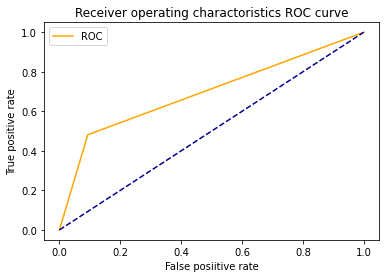

In [93]:
#Plotting ROC curve

plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1],[0,1], color="Darkblue", linestyle="--")
plt.xlabel("False posiitive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating charactoristics ROC curve")
plt.legend()
plt.show()

In [94]:
#Finding AUC score
auc_score=roc_auc_score(y_test, y_pred)
print(auc_score)

0.6941109381502087


We got auc score: 69%.

Now We can predict the Rainfall Tomorrow

In [95]:
conclusion=pd.DataFrame([clf.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690
Predicted,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Original,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Using Knn Classifier

In [96]:

from sklearn.model_selection import KFold, cross_val_score

In [97]:
#Building model to test unexposed data

x_train, x_test, y_train, y_test=train_test_split(x_scaled, y, test_size=0.25, random_state=1)

In [98]:
knn=KNeighborsClassifier()

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [99]:
metric_score(knn, x_train, x_test, y_train, y_test, train=True)

metric_score(knn, x_train, x_test, y_train, y_test, train=False)


 =============Train Result===============
Accuracy score:87.10%

 =============Test Result================
Accuracy score:81.67%

 
 classification report 
               precision    recall  f1-score   support

           0       0.84      0.93      0.89      1288
           1       0.67      0.45      0.54       403

    accuracy                           0.82      1691
   macro avg       0.76      0.69      0.71      1691
weighted avg       0.80      0.82      0.80      1691



Training accuracy score: 87%, Testing accuuracy score: 81%, Precision:76%, recall: 69%.

In [100]:
#Cross Validation

cross_val_score(knn, x_scaled, y, cv=5)


array([0.81670362, 0.71766445, 0.7566568 , 0.79881657, 0.81508876])

In [101]:
#Finding mean CV score
cross_val_score(KNeighborsClassifier(), x_scaled, y, cv=5).mean()

0.7809860402261902

Cross validation score: 78%

# Parameter tunning

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
param_grid={"algorithm":["kd_tree","brute"],
           "leaf_size":[3,5,6,7,8],
           "n_neighbors": [3,5,7,9,11,13]}

In [104]:
gridsearch= GridSearchCV(estimator=knn, param_grid=param_grid)

In [105]:
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [106]:
#Finding the best parameters

gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 11}

In [107]:
#We will use best parameters in our knn & check accuracy is increasing
knn=KNeighborsClassifier(algorithm="kd_tree",leaf_size=3, n_neighbors=11)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=11)

In [108]:
# Call the function & pass the dataset to check train test score
metric_score(knn, x_train, x_test, y_train, y_test, train=True)

metric_score(knn, x_train, x_test, y_train, y_test, train=False)


 =============Train Result===============
Accuracy score:84.68%

 =============Test Result================
Accuracy score:81.43%

 
 classification report 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      1288
           1       0.69      0.41      0.51       403

    accuracy                           0.81      1691
   macro avg       0.76      0.67      0.70      1691
weighted avg       0.80      0.81      0.80      1691



After parameter tunning we got accuracy score: 84%, Testing score: 81%, Precision : 76%, recall: 67%

In [109]:
#Lets plot confusion matrix
y_pred=knn.predict(x_test)


In [110]:
#Plotting confusion matrix
conf=confusion_matrix(y_test,y_pred)
conf

array([[1213,   75],
       [ 239,  164]], dtype=int64)

In [111]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred)

In [112]:
print("False Positive rate", fpr)
print("True Positive Rate", tpr)
print("Threshold", thresholds)

False Positive rate [0.         0.05822981 1.        ]
True Positive Rate [0.         0.40694789 1.        ]
Threshold [2 1 0]


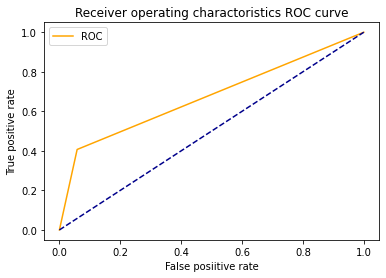

In [113]:
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1],[0,1], color="Darkblue", linestyle="--")
plt.xlabel("False posiitive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating charactoristics ROC curve")
plt.legend()
plt.show()

In [114]:
auc_score=roc_auc_score(y_test, y_pred)
print(auc_score)

0.6743590385771312


Now We can predict the Rainfall Tomorrow

In [115]:
conclusion=pd.DataFrame([knn.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690
Predicted,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Original,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Random Forest

In [116]:
random_clf= RandomForestClassifier()

random_clf.fit(x_train, y_train)


RandomForestClassifier()

In [117]:
metric_score(random_clf, x_train, x_test, y_train, y_test, train=True)

metric_score(random_clf, x_train, x_test, y_train, y_test, train=False)



 =============Train Result===============
Accuracy score:100.00%

 =============Test Result================
Accuracy score:83.68%

 
 classification report 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1288
           1       0.73      0.50      0.59       403

    accuracy                           0.84      1691
   macro avg       0.79      0.72      0.75      1691
weighted avg       0.83      0.84      0.83      1691



We got accuracy score training: 100%, testing score: 83%, Precision: 78%, recal: 72%.

# Parameter Tunning

In [118]:
param={"n_estimators":[13,15],
       "criterion":["entropy","gini"],
       "max_depth":[10,15],
       "min_samples_split":[10,11],
       "min_samples_leaf":[5,6]
       
      }

grd=GridSearchCV(random_clf, param_grid= param)

grd.fit(x_train,y_train)

print("best_params=>", grd.best_params_)

best_params=> {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 11, 'n_estimators': 13}


In [119]:
random_clf=RandomForestClassifier(criterion= 'gini', max_depth=10, min_samples_leaf=5, min_samples_split=11, n_estimators= 13)


random_clf.fit(x_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=11,
                       n_estimators=13)

In [120]:
metric_score(random_clf, x_train, x_test, y_train, y_test, train=True)

metric_score(random_clf, x_train, x_test, y_train, y_test, train=False)


 =============Train Result===============
Accuracy score:89.37%

 =============Test Result================
Accuracy score:83.09%

 
 classification report 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1288
           1       0.72      0.48      0.58       403

    accuracy                           0.83      1691
   macro avg       0.78      0.71      0.74      1691
weighted avg       0.82      0.83      0.82      1691



After paramter tunning we got Training accuracy score: 89%, Accuracy score: 82%, Precision: 77%, recall: 70%.

In [121]:
#Lets plot confusion matrix
y_pred=random_clf.predict(x_test)

In [122]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[1211,   77],
       [ 209,  194]], dtype=int64)

In [123]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred)

In [124]:
print("False Positive rate", fpr)
print("True Positive Rate", tpr)
print("Threshold", thresholds)

False Positive rate [0.         0.05978261 1.        ]
True Positive Rate [0.         0.48138958 1.        ]
Threshold [2 1 0]


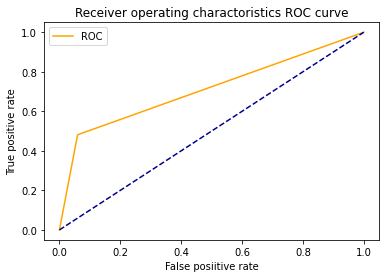

In [125]:
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1],[0,1], color="Darkblue", linestyle="--")
plt.xlabel("False posiitive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating charactoristics ROC curve")
plt.legend()
plt.show()

In [126]:
auc_score=roc_auc_score(y_test, y_pred)
print(auc_score)

0.7108034847340597


Now We can predict the Rainfall Tomorrow

In [127]:
conclusion=pd.DataFrame([random_clf.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690
Predicted,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Original,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Logistic Regression

In [128]:
#Model Training

log_reg= LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [129]:
y_pred=log_reg.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [130]:
#Finding the accuracy score

accuracy=accuracy_score(y_test, y_pred)
accuracy

0.8332347723240686

In [131]:
conf_matrix=confusion_matrix(y_test, y_pred)
conf_matrix

array([[1204,   84],
       [ 198,  205]], dtype=int64)

In [132]:
metric_score(log_reg, x_train, x_test, y_train, y_test, train=True)

metric_score(log_reg, x_train, x_test, y_train, y_test, train=False)


 =============Train Result===============
Accuracy score:84.07%

 =============Test Result================
Accuracy score:83.32%

 
 classification report 
               precision    recall  f1-score   support

           0       0.86      0.93      0.90      1288
           1       0.71      0.51      0.59       403

    accuracy                           0.83      1691
   macro avg       0.78      0.72      0.74      1691
weighted avg       0.82      0.83      0.82      1691



In [133]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred)

In [134]:
print("False Positive rate", fpr)
print("True Positive Rate", tpr)
print("Threshold", thresholds)

False Positive rate [0.         0.06521739 1.        ]
True Positive Rate [0.         0.50868486 1.        ]
Threshold [2 1 0]


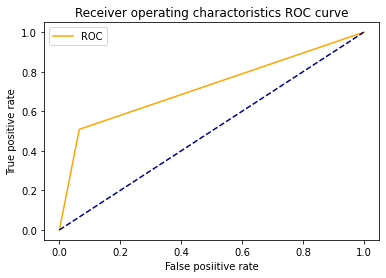

In [135]:
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1],[0,1], color="Darkblue", linestyle="--")
plt.xlabel("False posiitive rate")
plt.ylabel("True positive rate")
plt.title("Receiver operating charactoristics ROC curve")
plt.legend()
plt.show()


Now We can predict the Rainfall Tomorrow

In [136]:
conclusion=pd.DataFrame([log_reg.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690
Predicted,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Original,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


As per my Understanding All models given very good score. So we can finalise any model for prediction.

# Final model loading & prediction Actual Vs Predicted

In [137]:
#Saving the model in local file system 
import pickle

pickle.dump(random_clf, open("rf5", "wb"))

In [138]:
loaded_model=pickle.load(open("rf5", "rb"))
result=loaded_model.score(x_test, y_test)
print(result*100)

83.0869308101715


In [139]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690
Predicted,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Original,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
#We have choosed Random forest because of good accracy score & CV score.

# b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

In [141]:
x1=df.drop("Rainfall",axis=1)
y1=df["Rainfall"]

Seperating feature Vs Label. In that case our label is rainfall

In [142]:
#Scaling of dataset
scalar=StandardScaler()
x_scaler=scalar.fit_transform(x1)

Train Test Split

In [143]:
x_train, x_test, y_train, y_test= train_test_split(x_scaler,y1, test_size=0.25, random_state=1)

# Initialising modelfor prediction Linear Regression

In [144]:
lr= LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [145]:
#Checking training score

lr.score(x_train, y_train)

0.9396335076254462

We got training accuracy score: 93%

In [146]:
#Checking testing score

lr.score(x_test, y_test)

0.9395902831263195

Testing Accuracy score: 93%

In [147]:
    #plot to  visualize data
    y_pred=lr.predict(x_test)
    y_pred

array([0.16527518, 0.00579336, 0.04274141, ..., 0.25209882, 0.11605313,
       0.08552749])

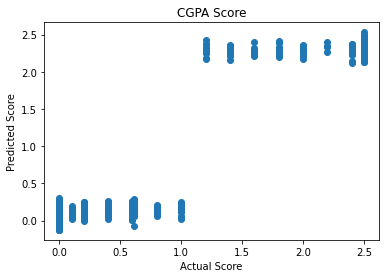

In [148]:
#Plotting the graph of Acutal score Vs Predicted score

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("CGPA Score")
plt.show()

In [149]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [150]:
y_pred= lr.predict(x_test)

In [151]:
#Mean square error
mean_absolute_error(y_test, y_pred)

0.1482746788235183

In [152]:
#MSE
mean_absolute_error(y_test, y_pred)

0.1482746788235183

In [153]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

0.23730610060594348

In [154]:
r2_score(y_test, y_pred)

0.9395902831263195

We got very good R2 score 93%,
Now we can predict the Predicted Vs Actual

In [155]:
conclusion=pd.DataFrame([lr.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690
Predicted,0.165275,0.005793,0.042741,-0.01074,0.136072,0.162453,2.4164,2.286099,0.130304,0.050923,...,-0.007485,2.261134,0.050905,0.092419,0.033793,2.340244,2.234294,0.252099,0.116053,0.085527
Original,0.100000,0.000000,0.000000,0.00000,0.200000,0.200000,2.5000,2.500000,0.000000,0.000000,...,0.000000,1.600000,0.000000,0.000000,0.000000,1.400000,2.500000,0.000000,0.200000,0.000000


# Random Forest

In [156]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [157]:
y_pred

array([0.195     , 0.        , 0.        , ..., 0.16      , 0.11      ,
       0.16102627])

In [158]:
#Training accuracy score

regressor.score(x_train, y_train)

0.9894759185967977

#We got very good training accuracy score: 98%

In [159]:
#Testing accuracy score
regressor.score(x_test, y_test)

0.9368567840934588

#Testing accuracy score: 93%

In [160]:
#Mean square error
mean_absolute_error(y_test, y_pred)

0.14342329418709188

In [161]:
#MSE
mean_absolute_error(y_test, y_pred)

0.14342329418709188

In [162]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

0.24261567215263563

In [163]:
#R2 Score
r2_score(y_test, y_pred)

0.9368567840934588

R2 score: 93%,
    
Now we can predict the predicted Vs Original

In [164]:
conclusion=pd.DataFrame([regressor.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690
Predicted,0.195,0.0,0.0,0.05,0.110513,0.321539,2.5,2.185,0.191026,0.01,...,0.02,2.295,0.05,0.145,0.04,2.475,2.35,0.16,0.11,0.161026
Original,0.100,0.0,0.0,0.00,0.200000,0.200000,2.5,2.500,0.000000,0.00,...,0.00,1.600,0.00,0.000,0.00,1.400,2.50,0.00,0.20,0.000000


# Ada Boost Regressor

In [165]:
from sklearn.ensemble import AdaBoostRegressor

In [166]:
ada=AdaBoostRegressor()
ada.fit(x_train, y_train)

AdaBoostRegressor()

In [167]:
#Model Prediction on train data
y_pred=ada.predict(x_train)


In [168]:
accuracy=metrics.r2_score(y_train, y_pred)
print("R Square Score" , accuracy)

R Square Score 0.926508646219707


In [169]:
#Model Prediction on test data
y_pred=ada.predict(x_test)


In [170]:
accuracy=metrics.r2_score(y_test, y_pred)
print("R Square Score" , accuracy)

R Square Score 0.9234527344050913


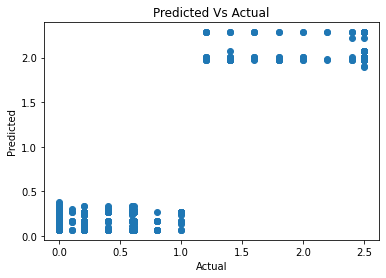

In [171]:
#Plotting the graph of Acutal score Vs Predicted score

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted Vs Actual")
plt.show()

In [172]:
#Mean square error
mean_absolute_error(y_test, y_pred)

0.197917654019592

In [173]:
#MSE
mean_absolute_error(y_test, y_pred)

0.197917654019592

In [174]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

0.2671285727309164

In [175]:
r2_score(y_test, y_pred)

0.9234527344050913

In [176]:
#cross validation is to check whether the model is overfitting

from sklearn.model_selection import KFold, cross_val_score

In [177]:
cv_score=cross_val_score(ada, x_scaler, y1, cv=4)
cv_score

array([0.91207463, 0.91294642, 0.92057481, 0.92927034])

In [178]:
cv_mean=cv_score.mean()
cv_mean

0.9187165492796165

In [179]:
conclusion=pd.DataFrame([ada.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690
Predicted,0.26423,0.065147,0.065147,0.067526,0.168335,0.26423,2.285335,1.988945,0.235619,0.067526,...,0.13552,1.988945,0.13552,0.157564,0.067526,2.285335,2.008569,0.328758,0.157564,0.157564
Original,0.10000,0.000000,0.000000,0.000000,0.200000,0.20000,2.500000,2.500000,0.000000,0.000000,...,0.00000,1.600000,0.00000,0.000000,0.000000,1.400000,2.500000,0.000000,0.200000,0.000000


# using knn regressor

In [180]:
knn= KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [181]:
#Checking training score

knn.score(x_train, y_train)

0.9183031088208796

In [182]:
#Checking testing score

knn.score(x_test, y_test)

0.8811502445532843

In [183]:

y_pred=knn.predict(x_test)
y_pred

array([0.24, 0.  , 0.08, ..., 0.36, 0.04, 0.04])

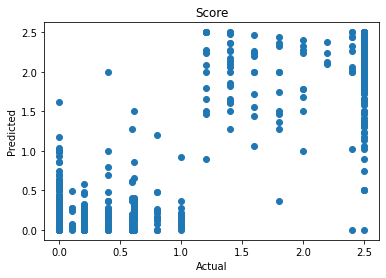

In [184]:
#Plotting the graph of Acutal score Vs Predicted score

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Score")
plt.show()

In [185]:
#Mean square error
mean_absolute_error(y_test, y_pred)

0.17464996150882506

In [186]:
#MSE
mean_absolute_error(y_test, y_pred)

0.17464996150882506

In [187]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

0.33285466587377815

In [188]:
r2_score(y_test, y_pred)

0.8811502445532843

In [189]:
#cross validation is to check whether the model is overfitting

from sklearn.model_selection import KFold, cross_val_score

In [190]:
cv_score=cross_val_score(knn, x_scaled, y, cv=4)
cv_score

array([0.19488861, 0.05197204, 0.13824291, 0.25820959])

In [191]:
cv_mean=cv_score.mean()
cv_mean

0.16082828641890515

Model prediction

In [192]:
conclusion=pd.DataFrame([knn.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690
Predicted,0.24,0.0,0.08,0.04,0.26,0.244105,2.5,1.82,0.04,0.0,...,0.0,2.0,0.16,0.32,0.04,2.18,2.14,0.36,0.04,0.04
Original,0.10,0.0,0.00,0.00,0.20,0.200000,2.5,2.50,0.00,0.0,...,0.0,1.6,0.00,0.00,0.00,1.40,2.50,0.00,0.20,0.00


# Final Model Saving & Prediction

In [193]:
#Saving the model in local file system 
import pickle

pickle.dump(lr, open("lr", "wb"))

In [194]:
loaded_model=pickle.load(open("lr", "rb"))
result=loaded_model.score(x_test, y_test)
print(result*100)

93.95902831263196


In [195]:
conclusion=pd.DataFrame([lr.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690
Predicted,0.165275,0.005793,0.042741,-0.01074,0.136072,0.162453,2.4164,2.286099,0.130304,0.050923,...,-0.007485,2.261134,0.050905,0.092419,0.033793,2.340244,2.234294,0.252099,0.116053,0.085527
Original,0.100000,0.000000,0.000000,0.00000,0.200000,0.200000,2.5000,2.500000,0.000000,0.000000,...,0.000000,1.600000,0.000000,0.000000,0.000000,1.400000,2.500000,0.000000,0.200000,0.000000


Observations:
    We have successfully predicted the Rain Tomorrow using variouse model but random forest give good score score hence we have finalise RF model.
    We have predicted rain fall using regression model, all model score is high.So we have chosen Linear regression model for final prediction